In [3]:
import pandas as pd
import numpy as np

import os
import matplotlib.pyplot as plt

def load_housing_data(housing_path='../data'):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [4]:
housing = load_housing_data()
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


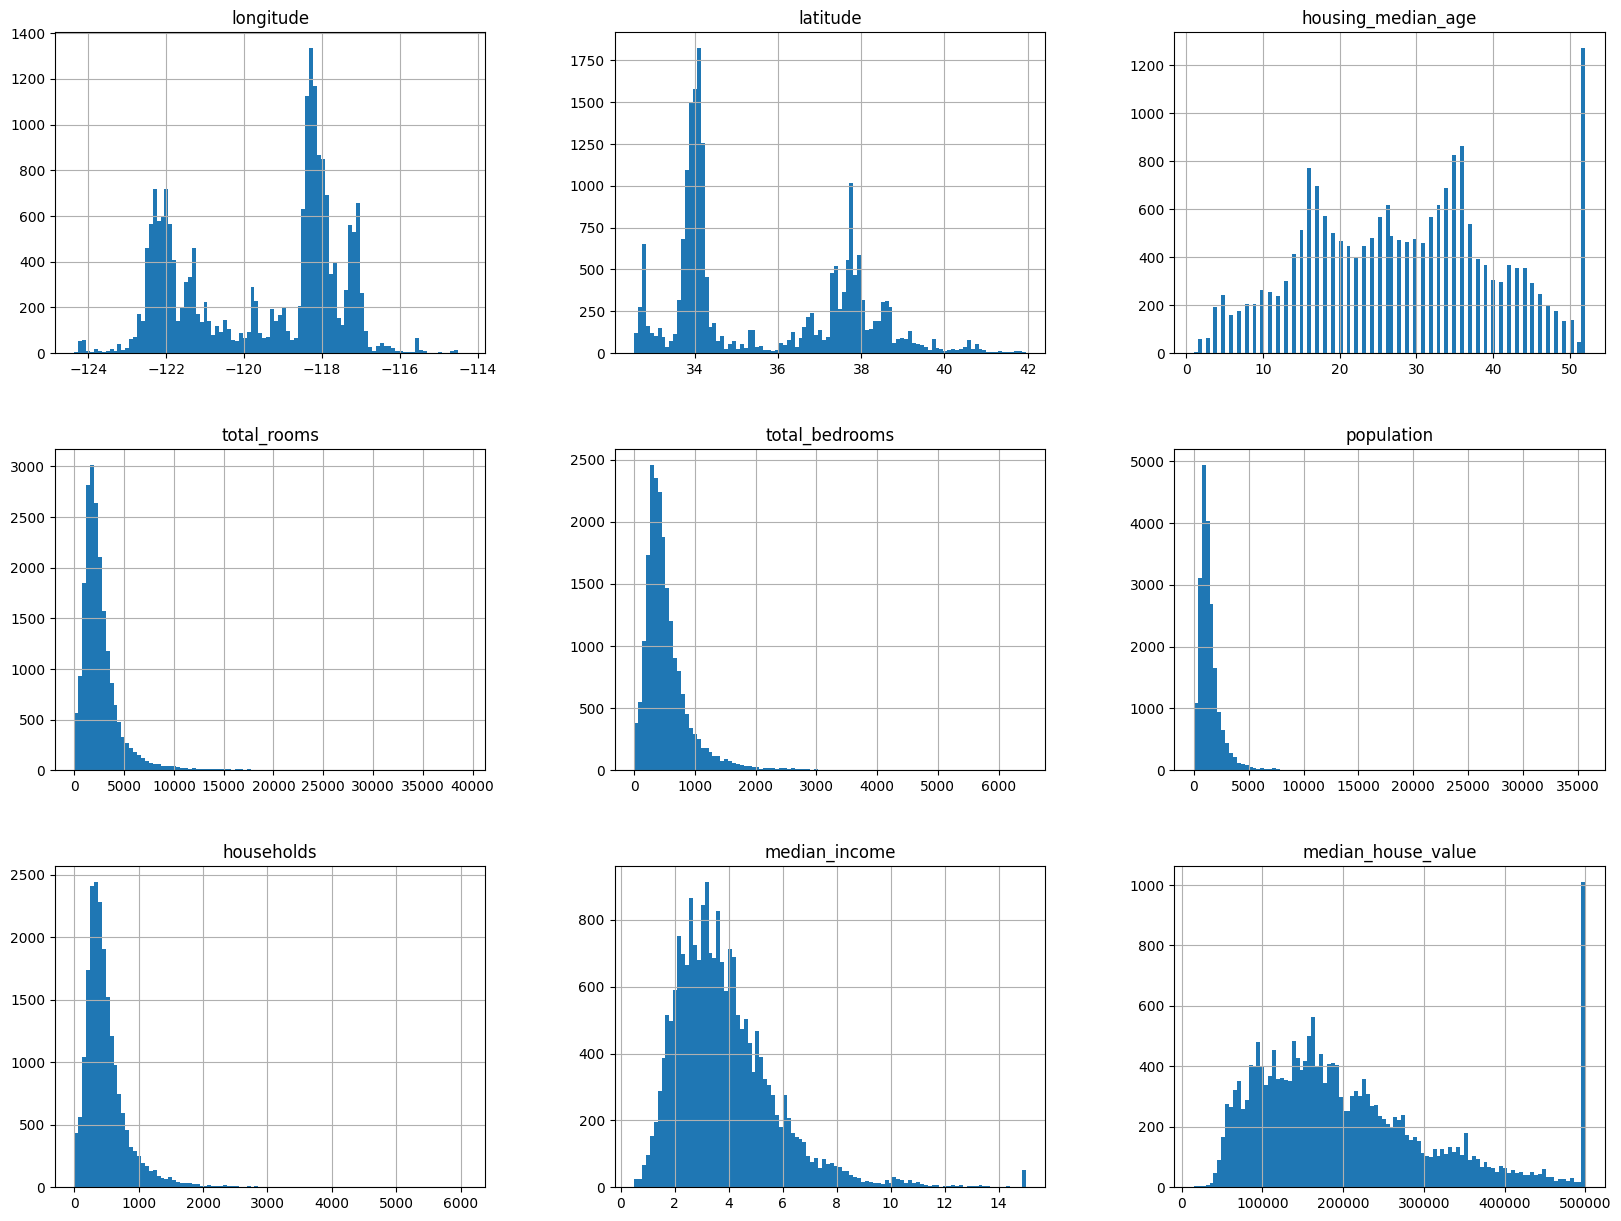

In [7]:
%matplotlib inline
housing.hist(bins = 100, figsize = (20,15))
plt.show()

### First, the median income attribute does not look like it is expressed in US dollars (USD). The data has been scaled and capped at 15 (actually, 15.0001) for higher median incomes, and at 0.5 (actually, 0.4999) for lower median incomes. The numbers represent roughly tens of thousands of dollars (e.g., 3 actually means about \$30,000).
### The housing median age and the median house value were also capped. The latter may be a serious problem since it is our target attribute 

In [8]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(test_ratio * len(data))
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices] , data.iloc[test_indices]

In [9]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set))

16512


<Axes: >

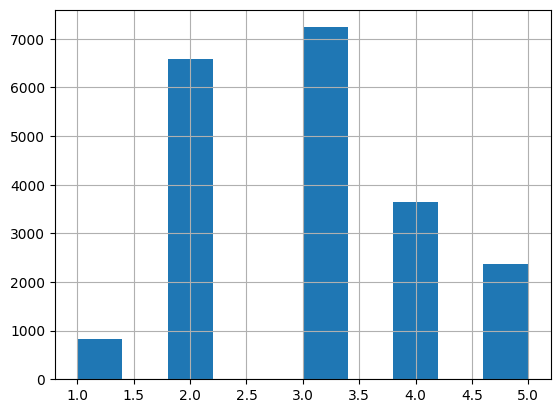

In [10]:
housing['income_category'] = pd.cut(housing['median_income'], bins = [0, 1.5, 3, 4.5, 6, np.inf], \
                                    labels = (1,2,3,4,5))
housing['income_category'].hist()

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing['income_category']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    
print(strat_test_set['income_category'].value_counts()/len(strat_test_set))

income_category
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64


In [16]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_category', axis = 1, inplace = True)

In [17]:
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

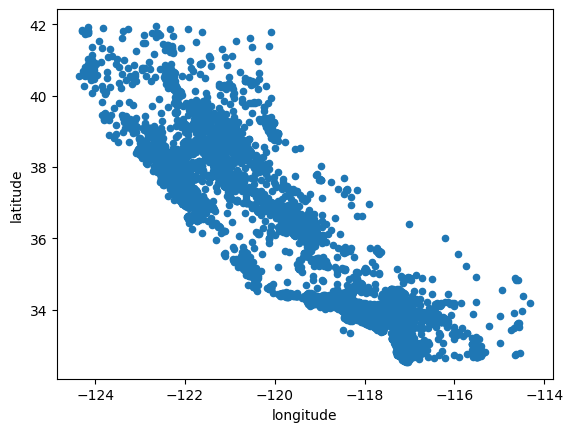

In [18]:
housing.plot(kind = 'scatter', x= 'longitude', y = 'latitude')

<Axes: xlabel='longitude', ylabel='latitude'>

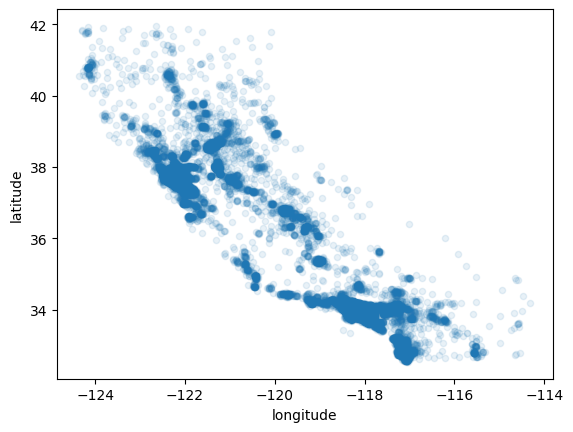

In [19]:
housing.plot(kind = 'scatter', x= 'longitude', y = 'latitude', alpha = 0.1)

<Axes: xlabel='longitude', ylabel='latitude'>

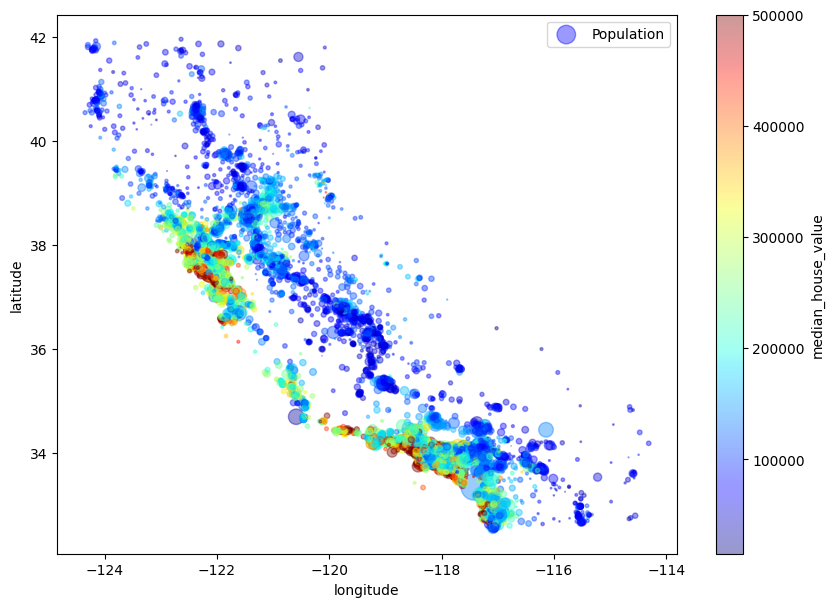

In [20]:
housing.plot(kind = 'scatter', x= 'longitude', y = 'latitude', alpha = 0.4, s = housing['population']/100, \
             label = 'Population',figsize = (10,7), c = "median_house_value",cmap = plt.get_cmap("jet"),   \
             colorbar = True)

In [21]:
corr_matrix = housing.iloc[:,:-1].corr()
print(corr_matrix)
print(corr_matrix['median_house_value'].sort_values(ascending = False))

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924478           -0.105823     0.048909   
latitude            -0.924478  1.000000            0.005737    -0.039245   
housing_median_age  -0.105823  0.005737            1.000000    -0.364535   
total_rooms          0.048909 -0.039245           -0.364535     1.000000   
total_bedrooms       0.076686 -0.072550           -0.325101     0.929391   
population           0.108071 -0.115290           -0.298737     0.855103   
households           0.063146 -0.077765           -0.306473     0.918396   
median_income       -0.019615 -0.075146           -0.111315     0.200133   
median_house_value  -0.047466 -0.142673            0.114146     0.135140   

                    total_bedrooms  population  households  median_income  \
longitude                 0.076686    0.108071    0.063146      -0.019615   
latitude                 -0.072550   -0.115290   -0.077765      -0.075146   
housing_

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

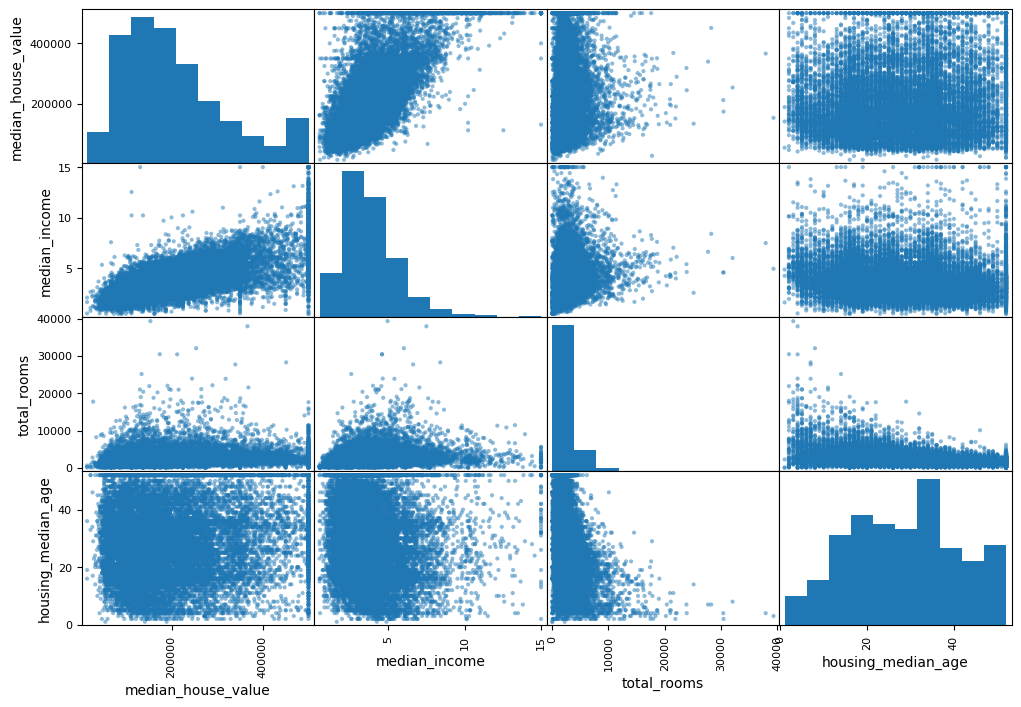

In [22]:
pd.plotting.scatter_matrix(housing[["median_house_value", "median_income", "total_rooms",
                  "housing_median_age"]], figsize = (12,8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

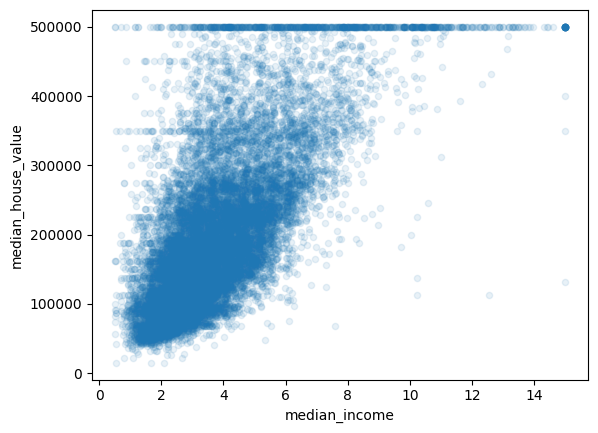

In [23]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
                 alpha=0.1)

In [24]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [25]:
corr_matrix = housing.iloc[:,[0,1,2,3,4,5,6,7,8,10,11,12]].corr()
print(corr_matrix['median_house_value'].sort_values(ascending = False))

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64


In [27]:
housing = strat_train_set.drop('median_house_value', axis = 1)
housing_labels = strat_train_set['median_house_value'].copy()

In [28]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')

In [29]:
housing_num = housing.drop('ocean_proximity', axis = 1)
imputer.fit(housing_num)
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [30]:
housing_imputed = imputer.transform(housing_num)
housing_tr = pd.DataFrame(housing_imputed, columns = housing_num.columns, index = housing_num.index)

In [31]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat = housing[["ocean_proximity"]]
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [32]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [33]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [34]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [35]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [36]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room 
    
    def fit(self, X, y=None):
        return self # nothing else to do 
    
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix] 
        population_per_household = X[:, population_ix] / X[:, households_ix] 
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('imputer',SimpleImputer(strategy = 'median')), ('attribs_adder', CombinedAttributesAdder()),
            ('std_scaler', StandardScaler()),])

housing_num_tr = num_pipeline.fit_transform(housing_num)
print(housing_num_tr)

[[-0.94135046  1.34743822  0.02756357 ...  0.01739526  0.00622264
  -0.12112176]
 [ 1.17178212 -1.19243966 -1.72201763 ...  0.56925554 -0.04081077
  -0.81086696]
 [ 0.26758118 -0.1259716   1.22045984 ... -0.01802432 -0.07537122
  -0.33827252]
 ...
 [-1.5707942   1.31001828  1.53856552 ... -0.5092404  -0.03743619
   0.32286937]
 [-1.56080303  1.2492109  -1.1653327  ...  0.32814891 -0.05915604
  -0.45702273]
 [-1.28105026  2.02567448 -0.13148926 ...  0.01407228  0.00657083
  -0.12169672]]


In [38]:
from sklearn.compose import ColumnTransformer 

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs),("cat", OneHotEncoder(), cat_attribs),])

In [39]:
housing_prepared = full_pipeline.fit_transform(housing)
print(housing_prepared)

[[-0.94135046  1.34743822  0.02756357 ...  0.          0.
   0.        ]
 [ 1.17178212 -1.19243966 -1.72201763 ...  0.          0.
   1.        ]
 [ 0.26758118 -0.1259716   1.22045984 ...  0.          0.
   0.        ]
 ...
 [-1.5707942   1.31001828  1.53856552 ...  0.          0.
   0.        ]
 [-1.56080303  1.2492109  -1.1653327  ...  0.          0.
   0.        ]
 [-1.28105026  2.02567448 -0.13148926 ...  0.          0.
   0.        ]]


In [40]:
from sklearn.linear_model import LinearRegression 

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [41]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [ 86208. 304704. 153536. 185728. 244416.]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [42]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68633.40810776998

In [43]:
from sklearn.metrics import r2_score
score = r2_score(housing_labels, housing_predictions)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 65.0%


In [44]:
from sklearn.tree import DecisionTreeRegressor 
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [45]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", tree_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [ 72100. 279600.  82700. 112500. 238300.]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [46]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [52]:
score = r2_score(housing_labels, housing_predictions)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 100.0%


In [47]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [50]:
def display_scores(scores):
    print('Scores :', scores)
    print('Mean :', scores.mean())
    print('Standard deviation :', scores.std())

In [51]:
display_scores(tree_rmse_scores)

Scores : [72139.87736903 70784.49565391 68848.91389707 69840.88438961
 70480.9943516  76737.50451354 70036.13675819 72976.02223084
 67129.60025446 71612.67486027]
Mean : 71058.71042785118
Standard deviation : 2462.912901485133


In [42]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)
display_scores(lin_rmse_scores)

Scores : [71800.38078269 64114.99166359 67844.95431254 68635.19072082
 66801.98038821 72531.04505346 73992.85834976 68824.54092094
 66474.60750419 70143.79750458]
Mean : 69116.4347200802
Standard deviation : 2880.6588594759014


In [56]:
#from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

forest_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, forest_predictions)
forest_rmse = np.sqrt(forest_mse)
print(forest_rmse)

score = r2_score(housing_labels, forest_predictions)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

#scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
#forrest_rmse_scores = np.sqrt(-scores)
#display_scores(forrest_rmse_scores)

18696.182706622574
The accuracy of our model is 97.0%


In [54]:
print(forest_rmse)

0.0


In [58]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'n_estimators': [50], 'max_features': [ 6, 8]},
        {'bootstrap': [False], 'n_estimators': [90, 100, 120], 'max_features': [6]},
]

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                               scoring='neg_mean_squared_error',
                               return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [6, 8], 'n_estimators': [50]},
                         {'bootstrap': [False], 'max_features': [6],
                          'n_estimators': [90, 100, 120]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [59]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 6, 'n_estimators': 100}

In [60]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=6)

In [61]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

49597.74147287606 {'max_features': 6, 'n_estimators': 50}
49698.01436103903 {'max_features': 8, 'n_estimators': 50}
48521.11275329526 {'bootstrap': False, 'max_features': 6, 'n_estimators': 90}
48344.15614454994 {'bootstrap': False, 'max_features': 6, 'n_estimators': 100}
48428.12457800524 {'bootstrap': False, 'max_features': 6, 'n_estimators': 120}


In [62]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.76560722e-02, 7.44410865e-02, 4.16457648e-02, 1.74436311e-02,
       1.56942210e-02, 1.70329193e-02, 1.58610163e-02, 3.21606468e-01,
       5.64887235e-02, 1.08201840e-01, 7.84179742e-02, 9.99605083e-03,
       1.58948909e-01, 8.02864836e-05, 2.51285963e-03, 3.97217676e-03])

In [63]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3216064679889888, 'median_income'),
 (0.15894890916261142, 'INLAND'),
 (0.10820184028078672, 'pop_per_hhold'),
 (0.07841797416722361, 'bedrooms_per_room'),
 (0.07765607219635925, 'longitude'),
 (0.07444108649176501, 'latitude'),
 (0.05648872351264532, 'rooms_per_hhold'),
 (0.04164576481641262, 'housing_median_age'),
 (0.01744363111418428, 'total_rooms'),
 (0.01703291928839238, 'population'),
 (0.015861016253959134, 'households'),
 (0.015694221030425098, 'total_bedrooms'),
 (0.009996050828355738, '<1H OCEAN'),
 (0.003972176756239408, 'NEAR OCEAN'),
 (0.0025128596280515145, 'NEAR BAY'),
 (8.028648359973255e-05, 'ISLAND')]

In [64]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

46519.46106514513


In [68]:
from scipy import stats

confidence = 0.95

squared_errors = (final_predictions - y_test) ** 2
print( np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,\
                         loc=squared_errors.mean(),scale=stats.sem(squared_errors))))
score = r2_score(y_test, final_predictions)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

[44526.93521691 48430.0790395 ]
The accuracy of our model is 83.0%
